In [73]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('./HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [75]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [76]:
# view data types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

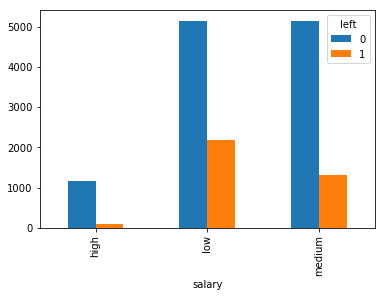

In [77]:
pd.crosstab(data.salary, data.left).plot(kind = 'bar')
plt.show()

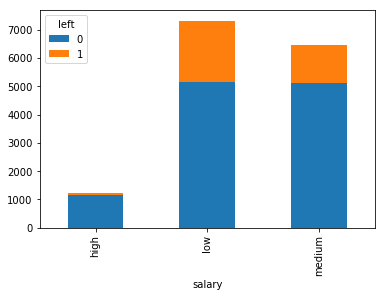

In [78]:
q = pd.crosstab(data.salary, data.left)
# every row divide by the sum of every column
q.div(q.sum(1), axis = 0)
q.plot(kind = 'bar', stacked = True)
plt.show() 

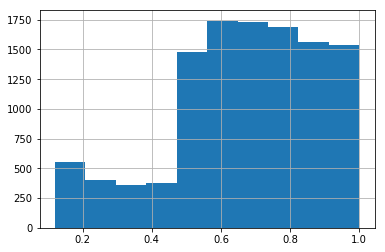

In [79]:
# satisfaction level of people who did not leave
data[data.left == 0].satisfaction_level.hist()
plt.show()

In [80]:
model = LogisticRegression()
y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', data, return_type='dataframe')
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'})          

                 

In [81]:
y = np.ravel(y) # change y into 1d array
y

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [82]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
model.score(X, y) # accurancy

0.79191946129741986

In [84]:
1 - sum(y) / len(y) # check if most result is already 1

0.76191746116407755

In [85]:
# display all the coefficent 
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))) 

,0,1
0,Intercept,[-0.72412181013]
1,Department: Random,[-0.464653354051]
2,Department: Accounting,[0.114807469957]
3,Department: HR,[0.344702497401]
4,Department: Management,[-0.361976915768]
5,Department: Marketing,[0.0942542721871]
6,Department: Product_Management,[-0.0380803171411]
7,Department: Sales,[0.0695353902177]
8,Department: Support,[0.150609692944]
9,Department: Technical,[0.173677034038]


In [86]:
model.predict_proba([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.7, 4.0, 260, 3, 0, 0]])

array([[ 0.8754679,  0.1245321]])

In [87]:
# calculate error rate
pred = model.predict(X)
abs(pred - y).sum() / len(y)

# calcualte accurany rate
1- abs(pred - y).sum() / len(y)

0.79191946129741986

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)
model2 = LogisticRegression()
model2.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
len(Xtest)
pred = model2.predict(Xtest)
metrics.accuracy_score(ytest, pred)


0.79088888888888886

In [90]:
metrics.confusion_matrix(ytest, pred)

array([[3202,  260],
       [ 681,  357]])

In [91]:
print(metrics.classification_report(ytest, pred))

             precision    recall  f1-score   support

        0.0       0.82      0.92      0.87      3462
        1.0       0.58      0.34      0.43      1038

avg / total       0.77      0.79      0.77      4500

